<a href="https://colab.research.google.com/github/devJos77/song_recommendation/blob/main/eda_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/TravelMode.csv"
col_names = ['rownames', 'individual', 'mode', 'choice', 'wait','vcost','travel','gcost','income','size']
df = pd.read_csv(url, header=None, names=col_names)


In [4]:
df.head(10)

,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
0,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
1,1,1,air,no,69,59,100,70,35,1
2,2,1,train,no,34,31,372,71,35,1
3,3,1,bus,no,35,25,417,70,35,1
4,4,1,car,yes,0,10,180,30,35,1
5,5,2,air,no,64,58,68,68,30,2
6,6,2,train,no,44,31,354,84,30,2
7,7,2,bus,no,53,25,399,85,30,2
8,8,2,car,yes,0,11,255,50,30,2
9,9,3,air,no,69,115,125,129,40,1


In [5]:
df.describe

<bound method NDFrame.describe of      rownames  individual   mode  choice  wait  vcost  travel  gcost  income  \
0    rownames  individual   mode  choice  wait  vcost  travel  gcost  income   
1           1           1    air      no    69     59     100     70      35   
2           2           1  train      no    34     31     372     71      35   
3           3           1    bus      no    35     25     417     70      35   
4           4           1    car     yes     0     10     180     30      35   
..        ...         ...    ...     ...   ...    ...     ...    ...     ...   
836       836         209    car     yes     0     27     510     82      20   
837       837         210    air      no    64     66     140     87      70   
838       838         210  train      no    44     54     670    156      70   
839       839         210    bus      no    53     33     664    134      70   
840       840         210    car     yes     0     12     540     94      70   

     size  
0    size  
1       1  
2       1  
3       1  
4       1  
..    ...  
836     1  
837     4  
838     4  
839     4  
840     4  

[841 rows x 10 columns]>

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rownames    841 non-null    object
 1   individual  841 non-null    object
 2   mode        841 non-null    object
 3   choice      841 non-null    object
 4   wait        841 non-null    object
 5   vcost       841 non-null    object
 6   travel      841 non-null    object
 7   gcost       841 non-null    object
 8   income      841 non-null    object
 9   size        841 non-null    object
dtypes: object(10)
memory usage: 65.8+ KB
None


In [7]:
# Explore Dimensions
print("Dataset dimensions:", df.shape)

Dataset dimensions: (841, 10)


In [8]:
# Data Handling and Cleaning
# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
rownames      0
individual    0
mode          0
choice        0
wait          0
vcost         0
travel        0
gcost         0
income        0
size          0
dtype: int64


In [9]:
# Remove columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

In [10]:
# Fill remaining missing values
df = df.fillna(df.ffill())


In [11]:
df.describe

<bound method NDFrame.describe of      rownames  individual   mode  choice  wait  vcost  travel  gcost  income  \
0    rownames  individual   mode  choice  wait  vcost  travel  gcost  income   
1           1           1    air      no    69     59     100     70      35   
2           2           1  train      no    34     31     372     71      35   
3           3           1    bus      no    35     25     417     70      35   
4           4           1    car     yes     0     10     180     30      35   
..        ...         ...    ...     ...   ...    ...     ...    ...     ...   
836       836         209    car     yes     0     27     510     82      20   
837       837         210    air      no    64     66     140     87      70   
838       838         210  train      no    44     54     670    156      70   
839       839         210    bus      no    53     33     664    134      70   
840       840         210    car     yes     0     12     540     94      70   

     size  
0    size  
1       1  
2       1  
3       1  
4       1  
..    ...  
836     1  
837     4  
838     4  
839     4  
840     4  

[841 rows x 10 columns]>

In [12]:
# Convert categorical variables to numeric
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = pd.Categorical(df[col]).codes

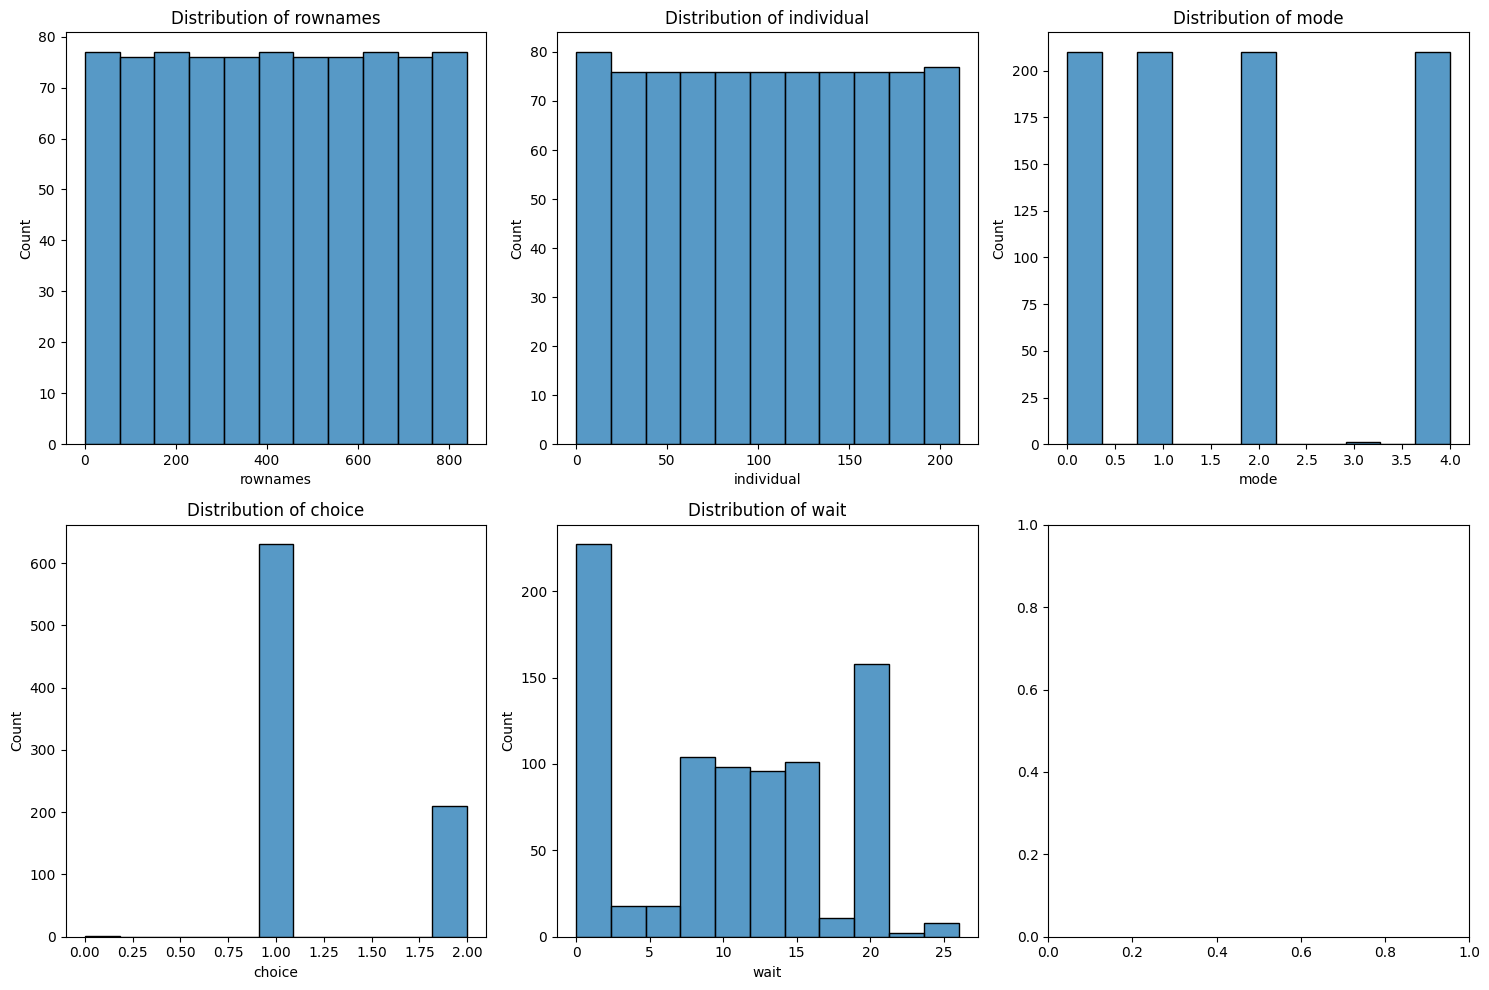

In [13]:
# Univariate Analysis
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns[:5]  # Limit to first 5 for brevity
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


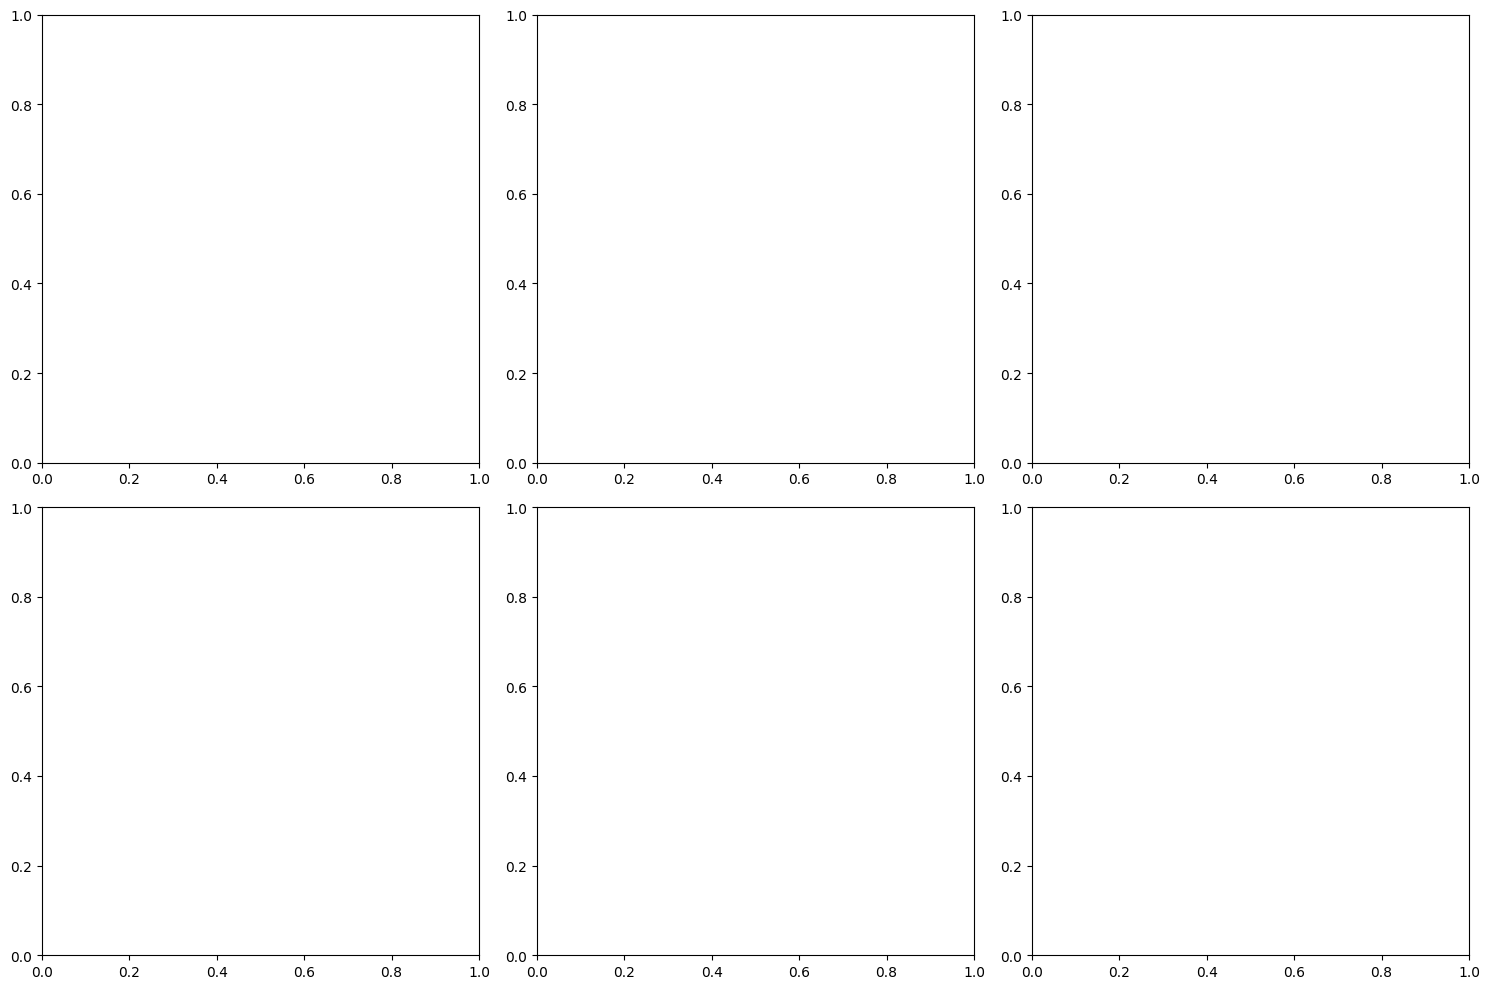

In [14]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(exclude=[np.number]).columns[:5]  # Limit to first 5 for brevity
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

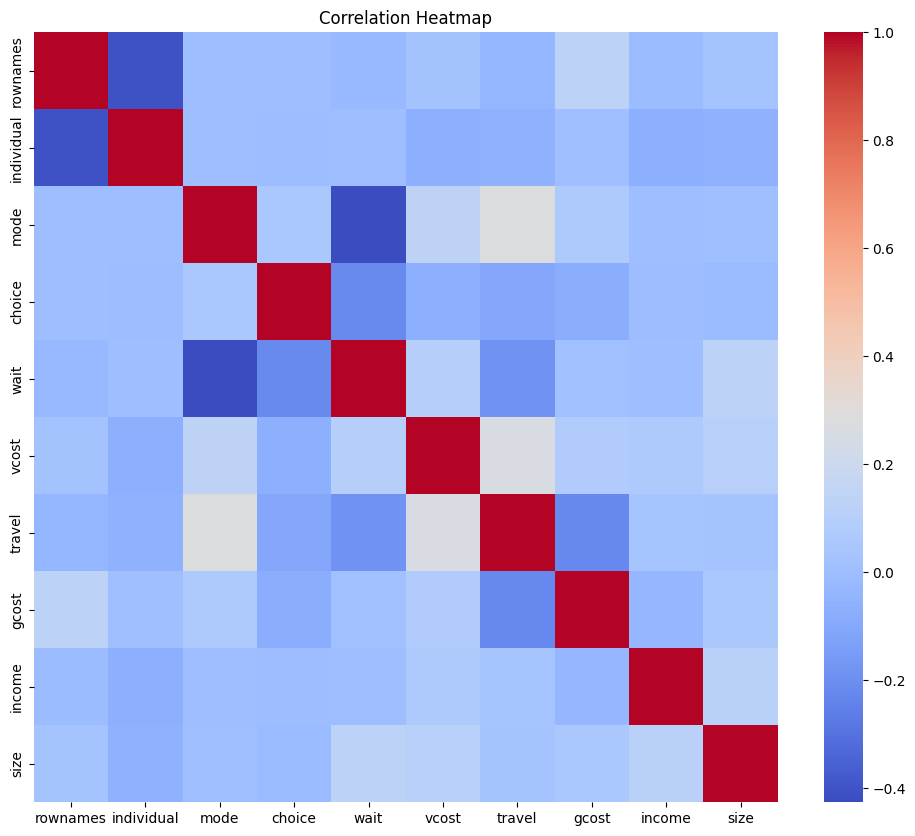

In [15]:
# Bivariate Analysis
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

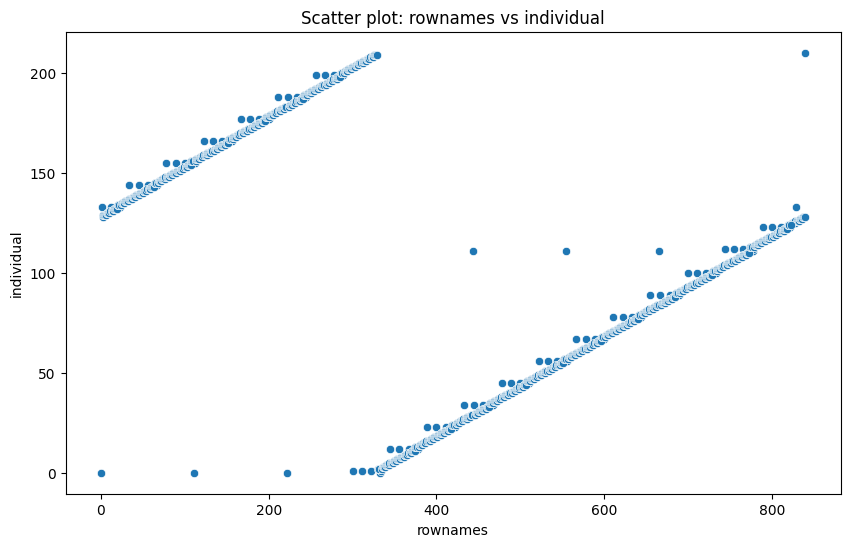

In [16]:
# Scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
plt.title(f'Scatter plot: {numerical_cols[0]} vs {numerical_cols[1]}')
plt.show()

In [21]:
# Box plot for a numerical variable grouped by a categorical variable
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
sns.boxplot(x=df[categorical_cols[0]], y=df[numerical_cols[0]])
plt.title(f'Box plot: {numerical_cols[0]} by {categorical_cols[0]}')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

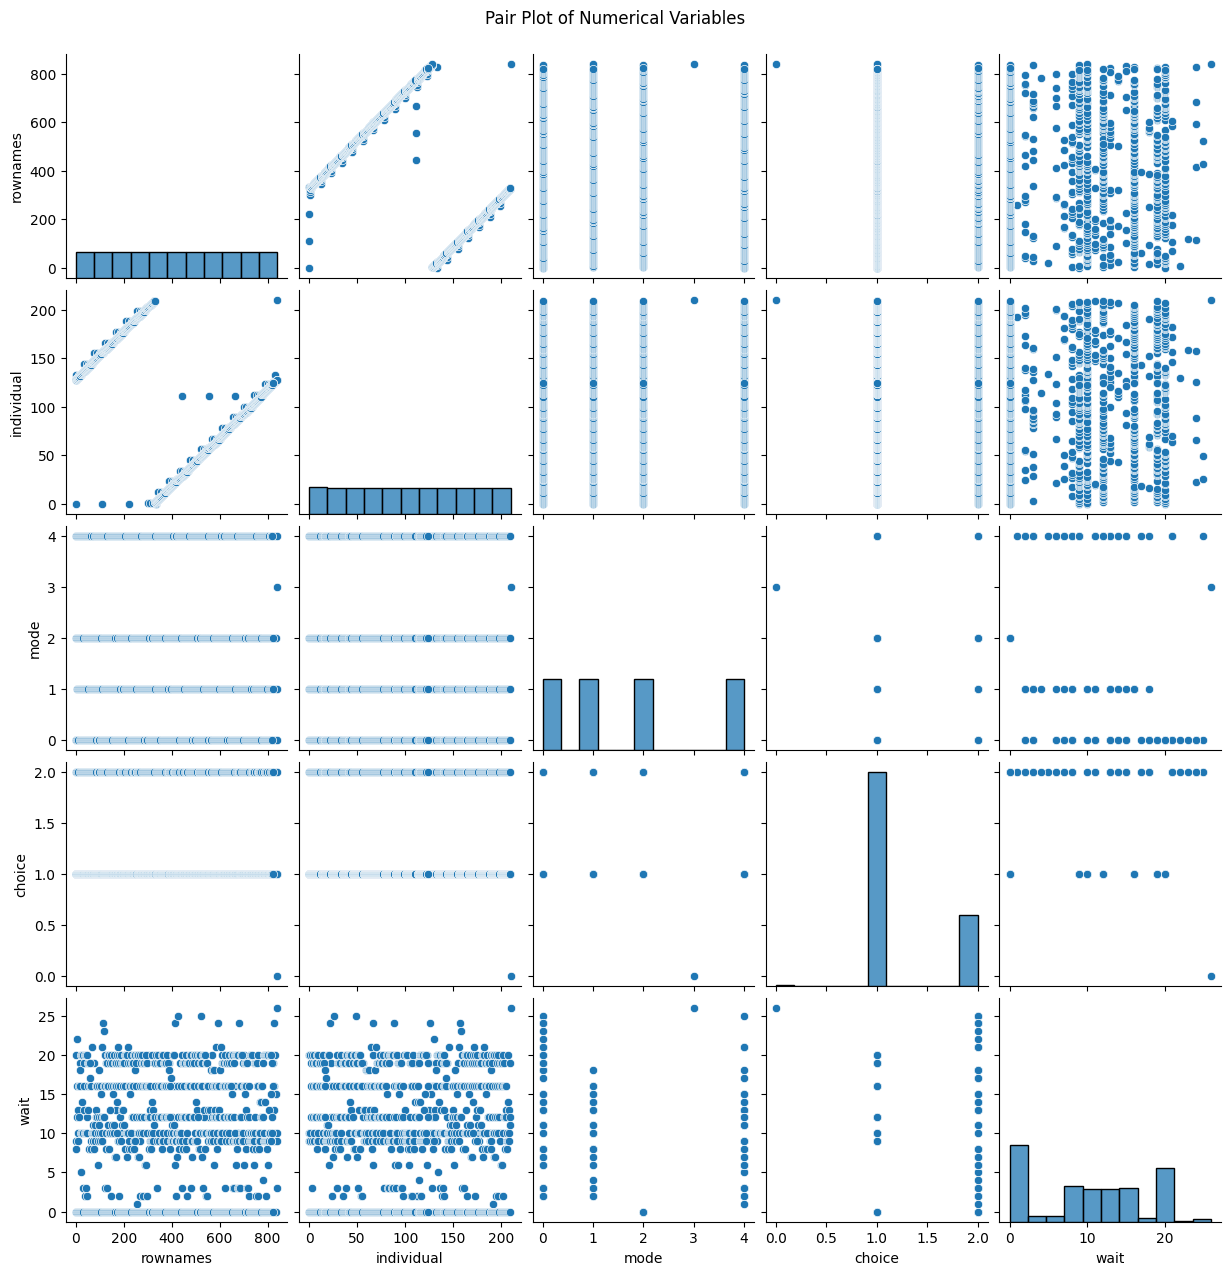

In [18]:
# Multivariate Analysis
# Pair plot for selected numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


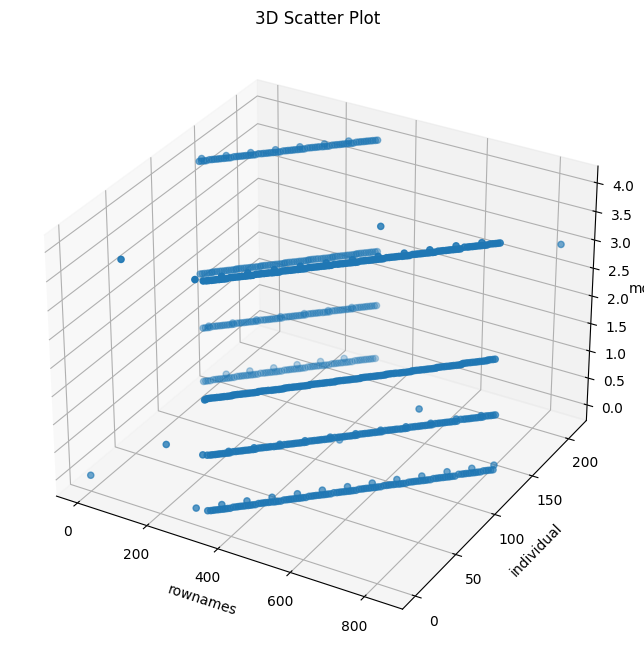

In [19]:
# 3D scatter plot for three numerical variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[numerical_cols[0]], df[numerical_cols[1]], df[numerical_cols[2]])
ax.set_xlabel(numerical_cols[0])
ax.set_ylabel(numerical_cols[1])
ax.set_zlabel(numerical_cols[2])
plt.title('3D Scatter Plot')
plt.show()

In [20]:
# ANOVA test for a numerical variable across categories
cat_col = categorical_cols[0]
num_col = numerical_cols[0]
categories = df[cat_col].unique()
data = [df[df[cat_col] == cat][num_col] for cat in categories]
f_statistic, p_value = stats.f_oneway(*data)
print(f"ANOVA test results for {num_col} across {cat_col}:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Print summary of findings
print("\nSummary of Findings:")
print("1. Dataset dimensions:", df.shape)
print("2. Number of missing values after cleaning:", df.isnull().sum().sum())
print("3. Highest correlation:", correlation_matrix.unstack().sort_values(ascending=False)[1])
print("4. ANOVA test results:", "Significant" if p_value < 0.05 else "Not significant")
print("5. Most frequent category in", categorical_cols[0], ":", df[categorical_cols[0]].mode()[0])
print("6. Mean of", numerical_cols[0], ":", df[numerical_cols[0]].mean())


Summary of Findings:
1. Dataset dimensions: (823, 132)
2. Number of missing values after cleaning: 7
3. Highest correlation: 1.0


/tmp/ipykernel_36/1148229549.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("3. Highest correlation:", correlation_matrix.unstack().sort_values(ascending=False)[1])


NameError: name 'p_value' is not defined